In [1]:
import cv2
from detection.live_detection import detect_cars
from pathlib import Path, WindowsPath
import matplotlib.pyplot as plt

ImportError: attempted relative import with no known parent package

In [2]:
MODELS_PATH = Path(r'C:\Users\jedrzej.adaszynski\Desktop\car_detection\trained-models')


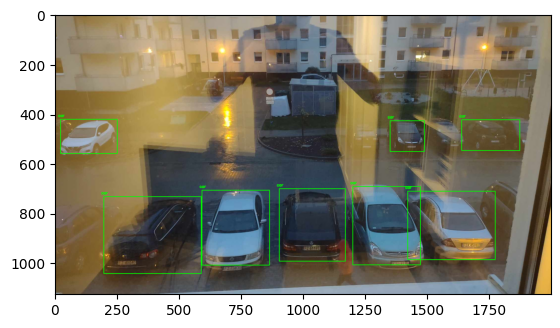

In [3]:
net = cv2.dnn.readNet(str(MODELS_PATH / 'yolov3.weights'), str(MODELS_PATH / 'yolov3.cfg'))
layer_names = net.getLayerNames()
output_layers = [layer_names[i - 1] for i in net.getUnconnectedOutLayers().flatten()]

with open(str(MODELS_PATH / "coco.names"), "r") as f:
    classes = [line.strip() for line in f.readlines()]

test_image_path = 'test_car_frame.jpg'
frame = cv2.imread(test_image_path)

# Check if the image was loaded correctly
if frame is not None:
    # Process the image with the detect_cars function from YOLO
    processed_frame = detect_cars(frame, net, classes)[0]

    # Save the processed image to a file or display it
    #cv2.imwrite('processed_test_car_frame.jpg', processed_frame)
    plt.imshow(cv2.cvtColor(processed_frame, cv2.COLOR_BGR2RGB))
    plt.show()
else:
    print(f"Error: Unable to load image at {test_image_path}")


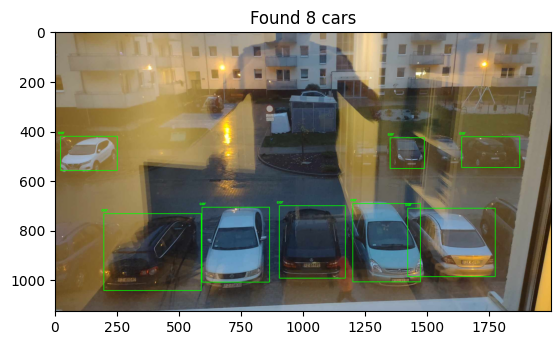

In [4]:
from detection.functions import find_cars
find_cars('test_car_frame.jpg')

In [7]:
from pathlib import Path

MODELS_PATH = Path('C:/Users/jedrzej.adaszynski/Desktop/car_detection/trained_models')
config_path = MODELS_PATH / 'yolov3.cfg'
weights_path = MODELS_PATH / 'yolov3.weights'

# Check if the configuration file exists
if not config_path.is_file():
    print(f"The configuration file {config_path} does not exist.")

# Check if the weights file exists
if not weights_path.is_file():
    print(f"The weights file {weights_path} does not exist.")


The configuration file C:\Users\jedrzej.adaszynski\Desktop\car_detection\trained_models\yolov3.cfg does not exist.
The weights file C:\Users\jedrzej.adaszynski\Desktop\car_detection\trained_models\yolov3.weights does not exist.


In [6]:
cap = cv2.VideoCapture(1)

# Check if the webcam is opened successfully
if not cap.isOpened():
    raise IOError("Cannot open webcam")

# Read a frame from the webcam
ret, frame = cap.read()

# Check if the frame is read correctly
if ret:
    # Save the captured image to a file
    cv2.imwrite('webcam_capture.jpg', frame)
    print("Image captured and saved!")
else:
    print("Failed to capture image")

# Release the VideoCapture object
cap.release()

# Close all OpenCV windows
cv2.destroyAllWindows()

Image captured and saved!


In [2]:
from urllib.parse import quote, unquote
import os
from carcounter import settings

image_path_decoded = unquote('raw')

def convert_to_file_system_path(web_path):
    return os.path.join(settings.MEDIA_ROOT, web_path)


convert_to_file_system_path(image_path_decoded)

'C:\\Users\\jedrzej.adaszynski\\Desktop\\car_detection\\carcounter\\media\\raw'

In [7]:
import cv2

# Read the image
image = cv2.imread('webcam_capture.jpg')

# Convert to the HSV (Hue, Saturation, Value) color space
hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# Scale the V (Value) channel of the HSV image
h, s, v = cv2.split(hsv)
v = cv2.convertScaleAbs(v, alpha=1.5, beta=0)  # Adjust the alpha value to control brightness

# Merge back the channels and convert to BGR color space
final_hsv = cv2.merge((h, s, v))
brightened_image = cv2.cvtColor(final_hsv, cv2.COLOR_HSV2BGR)

# Save the brightened image
cv2.imwrite('brightened_image.jpg', brightened_image)

# Display the original and the brightened image
cv2.imshow('Original Image', image)
cv2.imshow('Brightened Image', brightened_image)
cv2.waitKey(0)
cv2.destroyAllWindows()
